In [22]:
using Distributions, LinearAlgebra

In [23]:

using Arpack

using LaTeXStrings
using PyPlot
plt.style.use("ggplot")
plt.ion()


In [51]:
function GOE(n)
    d = Normal()
    W = rand(d, n,n)
    return (W + transpose(W)) ./ (sqrt(2 * n))
end



GOE (generic function with 1 method)

In [52]:
W = GOE(1000)
lambda, u = eigs(W, nev = 1, which=:LR)
println(lambda)

[1.9862399233937156]


In [59]:
function run_one_instance(n, max_rep, v, xi)
    max_eig = zeros(max_rep)
    corr = zeros(max_rep)
    for k in 1:max_rep
        W = GOE(n)
        A = xi .* v * transpose(v) + W
        lambda, u = eigs(Symmetric(A), nev = 1, which=:LR)
        max_eig[k] = lambda[1]
        corr[k] = abs(dot(u,v))
    end
    return mean(max_eig), mean(corr)
end

run_one_instance (generic function with 1 method)

In [69]:
n = 200
v = rand(n)
v = v / norm(v)

max_rep = 10^3


num_xi = 20
big_corr = zeros(20)
for i = 1:20
    xi = i / 10
    a, big_corr[i] = run_one_instance(n, max_rep, v, xi)
    println(big_corr[i])
end

0.06337706156913579
0.070983357939909
0.07753621700250343
0.09593015559327081
0.10855757004379049
0.12729978315065152
0.16003680791185979
0.20048149155646308
0.2526070988229715
0.3304347301963181
0.4207811282834395
0.5251715675717088
0.6086277503298295
0.6905562755964533
0.7383126981860114
0.7752648927522396
0.8062944859802432
0.8307417030237307
0.8483326872797289
0.8650873187707977


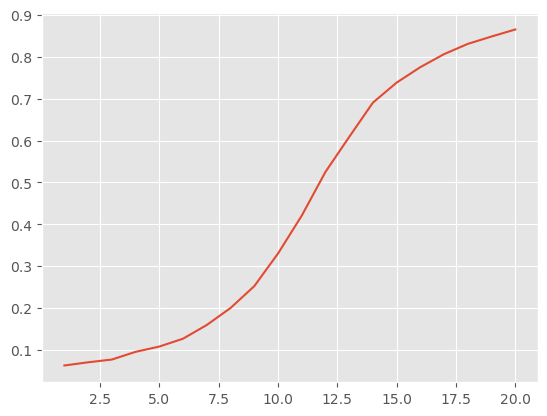

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc785b30dd0>

In [70]:


# # Now plot
plt.close("all")

plt.plot(1:num_xi, big_corr)


[1.9123542915209748]
0.18035667832638516
